In [565]:
% matplotlib inline
import os
from os import scandir
import logging
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import importlib

import IPython.display as ipd

import pandas as pd
import librosa

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

import feature_engineering
import train_test_set
import lib

importlib.reload(feature_engineering)
importlib.reload(train_test_set)

<module 'train_test_set' from '/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin/train_test_set.py'>

In [577]:

X_train, X_test, y_train, y_test = train_test_set.get_train_test_set(feature_version='feature_vector', from_pickle=False)#'feature_vector')

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#svc = SVC()
#svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.01, 0.1, 1, 10, 100]}

svcgs = SVC()
clf = GridSearchCV(svcgs, param_grid=parameters, cv=5)
clf.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))




FileNotFoundError: [Errno 2] No such file or directory: '../data/trial_data/crying/'

In [338]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [545]:
X_train, X_test, y_train, y_test = train_test_set.get_train_test_set(feature_version='feature_vector')#'feature_vector')

In [ ]:
get_train_test_set()

In [567]:
def model2(X_train, X_test, y_train, y_test):
    
    scaler_ = StandardScaler().fit(X_train)
    X_train_trans = scaler_.transform(X_train)
    
    param_grid = {'kernel':('linear', 'rbf'), 
                  'C':[0.01, 0.1, 1, 10, 100]}
    
    trained_model_ = GridSearchCV(SVC(), param_grid=param_grid, cv=5).fit(X_train_trans, y_train)
    
    y_pred = trained_model_.predict(scaler_.transform(X_test))
    print(classification_report(y_test, y_pred))
    
    return scaler_, trained_model_


scaler_, trained_model_ = model2(X_train, X_test, y_train, y_test)

             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95        72
        1.0       0.95      0.87      0.91        46

avg / total       0.93      0.93      0.93       118



In [568]:
def model_pipe(X_train, X_test, y_train, y_test):
    
    pipe = Pipeline([('scale', StandardScaler()),
                     ('classify', SVC())
                    ])

        
               
    param_grid = [{'scale': [None, StandardScaler()],
                   'classify__C': np.logspace(-3,3,1),
                   'classify__kernel': ['linear','rbf']
                  }]

    trained_pipe = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
    trained_pipe.fit(X_train, y_train)
    
    print(classification_report(y_test, trained_pipe.predict(X_test)))
    return trained_pipe, pipe


trained_pipe, pipe = model_pipe(X_train, X_test, y_train, y_test)

             precision    recall  f1-score   support

        0.0       0.86      0.93      0.89        72
        1.0       0.88      0.76      0.81        46

avg / total       0.87      0.86      0.86       118



In [550]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('scale', None), ('classify', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [555]:
def predict2(filepath, trained_grid):
    
    f = feature_engineering.Features(filepath)
    feature_vector, feature_matrix = f.featurize()
    
    # print statments on feature vec 
    prediction = trained_grid.predict(feature_vector.reshape(1,-1))
    
    print("File {}: {}".format(filepath, int(prediction)))
    
    return prediction
    
tmp_file = folder + 'out00021.wav'
prediction = predict2(tmp_file,grid)
prediction

File ../data/trial_data/crying/out00021.wav: 0


array([0.])

In [551]:
X_test.values[4,:]

array([-3.00166830e+02,  1.32500208e+02, -1.61773896e+01,  1.97464120e+01,
       -1.72712976e+01, -6.95636672e+00,  1.44591955e+00, -8.66061083e+00,
       -1.09663509e+00, -1.15043539e+01, -1.72864772e+00, -8.82766545e+00,
       -9.74063449e+00,  5.20270524e-02,  2.78665230e+03,  2.42740292e+03,
        6.60882310e+03,  6.01789448e-02])

In [552]:
grid.predict(X_test)

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.])

In [433]:
def model(X_train, X_test, y_train, y_test):
    """
    Create a pipeline and train a grid searched model
    :param train:
    :param test:
    :return:
    """
    
    pickle_root = '../data/pickles/'

    logging.info('Begin model')

    # Train scaler
    scaler = StandardScaler().fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)


    #svc.fit(X_train_scaled, y_train)

    #y_pred = svc.predict(X_test_scaled)

    parameters = {'kernel':('linear', 'rbf'), 
                  'C':[0.01, 0.1, 1, 10, 100]}

    clf = GridSearchCV(SVC(), param_grid=parameters, cv=5)
    trained_model = clf.fit(X_train_scaled, y_train)
    
    # Validate on X_test:
    X_test_scaled = scaler.transform(X_test)
    y_pred = trained_model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    
    logging.info('Training model')
    #trained_model.fit(X_train, y_train)

    # Set prediction
    #for data_set in [X_train, X_test]:
    #    data_set['pred'] = trained_model.predict(data_set)

    # lib.archive_dataset_schemas('model', locals(), globals())
    logging.info('End model')
    
    lib.dump_pickle(pipe, pickle_root+'linear_pipe.pkl')
    
    lib.dump_pickle(scaler, pickle_root+'linear_scaler.pkl')
    lib.dump_pickle(trained_model, pickle_root+'linear_trained_model.pkl')

    
    #def predict_from_model()
    
    return scaler, trained_model

scaler, trained_model = model(X_train, X_test, y_train, y_test)

y_pred = trained_model.predict(scaler.transform(X_test))

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94        65
        1.0       0.98      0.87      0.92        53

avg / total       0.94      0.93      0.93       118

             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94        65
        1.0       0.98      0.87      0.92        53

avg / total       0.94      0.93      0.93       118



In [434]:
X_test.head()

,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
62,-795.209070,99.976713,-43.779945,-0.372505,3.752796,-22.353393,2.041088,-2.346587,-8.740918,2.243258,-6.349948,-5.506922,0.875322,0.000075,5101.098627,4596.526116,13133.282557,0.104184
395,-802.056001,95.642049,-46.121494,-1.441071,2.960844,-22.590060,1.778047,-2.824758,-9.339048,2.340543,-5.230745,-4.422705,0.957338,0.000083,4921.744428,4501.911692,12586.460511,0.105070
286,-369.945626,89.044151,-51.592482,18.492475,-11.054607,9.102990,-0.269006,-18.395686,4.081560,-8.191317,2.071172,-2.869617,-4.357150,0.026559,2815.569039,3530.898586,7687.302968,0.123567
427,-620.721028,97.730135,-36.271564,10.188035,-1.906691,-34.336818,-8.216369,-13.800271,-12.881118,5.096638,-7.626443,-4.816189,10.333577,0.003778,2948.598331,2818.973030,6594.164351,0.073789
366,-626.153547,142.917508,-69.693178,4.907848,-0.693840,-42.827105,1.541891,-10.723591,-27.375339,-3.700553,-5.240152,-0.630849,4.365743,0.002002,2652.765230,2675.143210,5431.977952,0.081577


# Use trained model to predict from individual sound data:

First, reshape individual entry so the pipeline will accept it:

In [437]:
X_test.loc[[395,62]]

,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
395,-802.056001,95.642049,-46.121494,-1.441071,2.960844,-22.590060,1.778047,-2.824758,-9.339048,2.340543,-5.230745,-4.422705,0.957338,0.000083,4921.744428,4501.911692,12586.460511,0.105070
62,-795.209070,99.976713,-43.779945,-0.372505,3.752796,-22.353393,2.041088,-2.346587,-8.740918,2.243258,-6.349948,-5.506922,0.875322,0.000075,5101.098627,4596.526116,13133.282557,0.104184


In [448]:
y_test

62     0.0
395    1.0
286    0.0
427    1.0
366    1.0
136    0.0
576    0.0
544    0.0
392    1.0
262    0.0
123    0.0
17     1.0
425    1.0
217    0.0
358    1.0
72     0.0
9      1.0
248    0.0
390    1.0
122    0.0
470    1.0
289    0.0
336    1.0
210    0.0
174    0.0
93     0.0
463    1.0
280    0.0
40     1.0
488    0.0
      ... 
1      1.0
151    0.0
347    1.0
584    0.0
130    0.0
409    1.0
127    0.0
188    0.0
350    1.0
449    1.0
270    0.0
263    0.0
292    0.0
570    0.0
547    0.0
419    1.0
124    0.0
182    0.0
300    1.0
521    0.0
67     0.0
21     1.0
69     0.0
79     0.0
480    0.0
242    0.0
446    1.0
13     1.0
83     0.0
471    1.0
Name: label, Length: 118, dtype: float64

In [465]:
A = X_test.loc[427]
B = A.values.reshape(1,-1)
#np.reshape(A, (-1, 2))

In [471]:
A

array([[-6.20721028e+02,  9.77301346e+01, -3.62715638e+01,
         1.01880351e+01, -1.90669135e+00, -3.43368178e+01,
        -8.21636869e+00, -1.38002707e+01, -1.28811178e+01,
         5.09663825e+00, -7.62644317e+00, -4.81618855e+00,
         1.03335767e+01,  3.77822219e-03,  2.94859833e+03,
         2.81897303e+03,  6.59416435e+03,  7.37889250e-02]])

In [467]:
B

array([[-6.20721028e+02,  9.77301346e+01, -3.62715638e+01,
         1.01880351e+01, -1.90669135e+00, -3.43368178e+01,
        -8.21636869e+00, -1.38002707e+01, -1.28811178e+01,
         5.09663825e+00, -7.62644317e+00, -4.81618855e+00,
         1.03335767e+01,  3.77822219e-03,  2.94859833e+03,
         2.81897303e+03,  6.59416435e+03,  7.37889250e-02]])

Predict for .loc[399]:

In [472]:
y_pred = trained_model.predict(scaler.transform(A.values.reshape(1,-1))) 
y_pred

array([1.])

In [523]:
A.values.reshape(1,-1,1,1).shape

(1, 18, 1, 1)

In [519]:
scaler.transform(A.values.reshape(1,-1))

array([[-0.28305747, -0.38367865,  0.20316163,  0.22767733, -0.05063597,
        -1.11393872, -1.07216927, -1.06814723, -0.45880347,  0.89139661,
        -0.84367997, -0.43053214,  1.97329281, -0.35110018, -0.30601033,
        -0.28331156, -0.30639777, -0.29528166]])

In [469]:
y_pred = trained_model.predict(scaler.transform(B)) 
y_pred

array([1.])

In [572]:
importlib.reload(feature_engineering)



def predict(filepath, trained_model, scaler):
    f = feature_engineering.Features(filepath)
    feature_vector, feature_matrix = f.featurize()
    prediction =trained_model.predict(scaler.transform(feature_vector.reshape(1,-1))) 
    print("File {}: {}".format(filepath, int(prediction)))
    
    return prediction
    
tmp_file = '../data/trial_data/crying/' + 'out00021.wav'
prediction = predict(tmp_file, trained_model_, scaler_)
prediction

File ../data/trial_data/crying/out00021.wav: 0


array([0.])

In [498]:
trained_model.predict(scaler.transform(v.reshape(1,-1))) 

array([0.])

## Predict for folder of the positive class:

In [557]:
folder = '../data/live_stream_conversions/'
#folder = '../data/trial_data/crying/'

#folder = '../data/trial_data/aria_crying/'


tmp_file = folder + 'out00021.wav'


prediction_results = []
for file in os.listdir(folder):
            if file != '.DS_Store':
                print(file)
                
                prediction_results.append((file, predict2(folder+file, grid)))


aria_mixed_cry_noise053.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise053.wav: 0
aria_mixed_cry_noise054.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise054.wav: 0
aria_mixed_cry_noise055.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise055.wav: 0
aria_mixed_cry_noise056.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise056.wav: 0
aria_mixed_cry_noise057.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise057.wav: 0
aria_mixed_cry_noise058.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise058.wav: 0
aria_mixed_cry_noise059.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise059.wav: 0
aria_mixed_cry_noise060.wav
File ../data/live_stream_conversions/aria_mixed_cry_noise060.wav: 0
audio_chunk_2018-06-18_14-13-43.wav
File ../data/live_stream_conversions/audio_chunk_2018-06-18_14-13-43.wav: 0
audio_chunk_2018-06-18_14-13-44.wav
File ../data/live_stream_conversions/audio_chunk_2018-06-18_14-13-44.wav: 0
audio_ch

In [559]:
tmpfile = '../data/live_stream_conversions/audio_chunk_2018-06-18_14-20-37.wav'

f = feature_engineering.Features(tmpfile)
v,m = f.featurize()

In [560]:
f.raw_audio_vec.shape

(218111,)

## All predicted results are 0:

In [476]:
prediction_results

[('aria_crying_w_footsteps000.wav', array([0.])),
 ('aria_crying_w_footsteps001.wav', array([0.])),
 ('aria_crying_w_footsteps002.wav', array([0.])),
 ('aria_crying_w_footsteps003.wav', array([0.])),
 ('aria_crying_w_footsteps004.wav', array([0.])),
 ('aria_crying_w_footsteps005.wav', array([0.])),
 ('aria_mixed_cry_noise045.wav', array([0.])),
 ('aria_mixed_cry_noise046.wav', array([0.])),
 ('aria_mixed_cry_noise048.wav', array([0.])),
 ('aria_mixed_cry_noise049.wav', array([0.])),
 ('aria_mixed_cry_noise053.wav', array([0.])),
 ('aria_mixed_cry_noise054.wav', array([0.])),
 ('aria_mixed_cry_noise055.wav', array([0.])),
 ('aria_mixed_cry_noise056.wav', array([0.])),
 ('aria_mixed_cry_noise057.wav', array([0.])),
 ('aria_mixed_cry_noise058.wav', array([0.])),
 ('aria_mixed_cry_noise059.wav', array([0.])),
 ('aria_mixed_cry_noise060.wav', array([0.])),
 ('aria_mixed_cry_noise061.wav', array([0.])),
 ('aria_mixed_cry_noise062.wav', array([0.])),
 ('aria_mixed_cry_noise063.wav', array([0.

In [397]:
ipd.Audio(tmp_file)

In [404]:
f = feature_engineering.Features(tmp_file)

feature_vector, feature_matrix = f.engineer_features()
print(f.raw_audio_vec.shape)
print(feature_vector.shape)
print(feature_matrix.shape)

pred = trained_model.predict(scaler.transform(feature_vector.reshape(1,-1)))

pred

(218111,)
(18,)
(18, 426)


array([0.])

In [384]:
prediction_results

[('out00006.wav', array([0.])),
 ('out00007.wav', array([0.])),
 ('out00008.wav', array([0.])),
 ('out00009.wav', array([0.])),
 ('out00010.wav', array([0.])),
 ('out00011.wav', array([0.])),
 ('out00013.wav', array([0.])),
 ('out00014.wav', array([0.])),
 ('out00015.wav', array([0.])),
 ('out00016.wav', array([0.])),
 ('out00017.wav', array([0.])),
 ('out00018.wav', array([0.])),
 ('out00019.wav', array([0.])),
 ('out00020.wav', array([0.])),
 ('out00021.wav', array([0.])),
 ('out00022.wav', array([0.])),
 ('out00023.wav', array([0.])),
 ('out00024.wav', array([0.])),
 ('out00025.wav', array([0.])),
 ('out00026.wav', array([0.])),
 ('out00027.wav', array([0.])),
 ('out00028.wav', array([0.])),
 ('out00029.wav', array([0.])),
 ('out00030.wav', array([0.])),
 ('out00031.wav', array([0.])),
 ('out00032.wav', array([0.])),
 ('out00033.wav', array([0.])),
 ('out00034.wav', array([0.])),
 ('out00035.wav', array([0.])),
 ('out00036.wav', array([0.])),
 ('out00037.wav', array([0.])),
 ('out00

In [385]:
trained_model.predict(scaler.transform(feature_vector.reshape(1,-1))) 

array([0.])

In [ ]:
pipe.transform()

In [341]:
trained_model.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [416]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D
from keras.optimizers import Adam
from keras.utils import np_utils
#from sklearn import metrics

num_labels = 1
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(18, 426)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='adam')

In [417]:
X_train, X_test, y_train, y_test = train_test_set.get_train_test_set(feature_version='feature_matrix')#'feature_vector')


In [429]:
X_train.values[0][0].shape

(18, 426)

In [427]:
model.fit(X_train.values, y_train, epochs=10, batch_size=32)

ValueError: Error when checking input: expected dense_1_input to have shape (40,) but got array with shape (1,)

In [263]:
raw_vector[0][:221184-4].shape

(221180,)

In [51]:
df = pd.DataFrame(raw_audio_data, columns=['label', 'raw_audio', 'sampling_rate'])
df = df[df['vec_len']>=220160]  # drop all vecs shorter than 220160 sample points

<module 'feature_engineering' from '/Users/timcodes/ds/metis/metisgh/05_Kojak/WeeBro/bin/feature_engineering.py'>

In [214]:
%%time
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),
                                                    df['label'], 
                                                    test_size=0.2)


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters, cv=5)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96        65
        1.0       0.98      0.91      0.94        53

avg / total       0.95      0.95      0.95       118

CPU times: user 706 ms, sys: 4.32 ms, total: 710 ms
Wall time: 721 ms


In [ ]:
pipe = Pipeline()

In [ ]:
clf = svm.SVC(kernel='linear')
pipe = Pipeline([('anova', anova_filter), ('svc', clf)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm
anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
                     



prediction = anova_svm.predict(X)
anova_svm.score(X, y)                        


In [ ]:
pipe = Pipeline([
                ('reduce_dim', PCA()),
                ('classify', LinearSVC())
            ])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)

<class 'numpy.ndarray'> (1025, 431) 15.781399 -64.2186


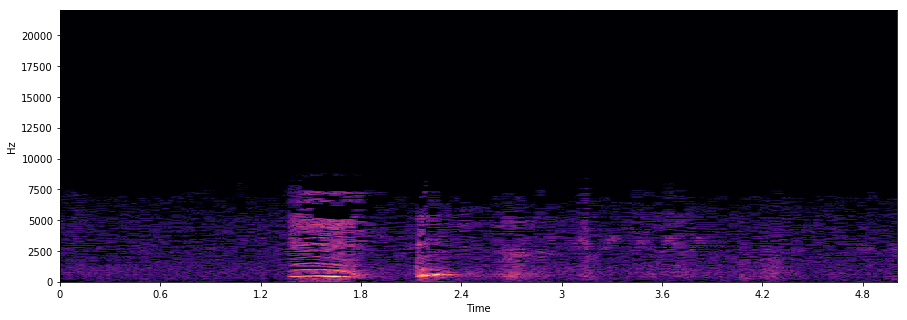

In [97]:
S = librosa.amplitude_to_db(abs(X))
print(type(S),S.shape, S.max(), S.min())

plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')

In [98]:
S

array([[-54.485836, -62.160904, -64.2186  , ..., -64.2186  , -54.38948 ,
        -47.878414],
       [-53.81979 , -59.034916, -64.2186  , ..., -64.2186  , -53.025826,
        -45.900642],
       [-53.291466, -59.279057, -64.2186  , ..., -50.016945, -47.34986 ,
        -46.201363],
       ...,
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ],
       [-64.2186  , -64.2186  , -64.2186  , ..., -64.2186  , -64.2186  ,
        -64.2186  ]], dtype=float32)

In [99]:
S1

array([[1.8867230e-03, 7.7974919e-04, 3.1859204e-04, ..., 1.9189759e-04,
        1.9077692e-03, 4.0371912e-03],
       [2.0370912e-03, 1.1175172e-03, 1.4965958e-04, ..., 5.4216034e-05,
        2.2320745e-03, 5.0695338e-03],
       [2.1648449e-03, 1.0865437e-03, 1.2822979e-04, ..., 3.1561144e-03,
        4.2904895e-03, 4.8970194e-03],
       ...,
       [2.5215882e-04, 1.2935848e-04, 1.7410316e-04, ..., 1.5223165e-04,
        2.6926372e-04, 3.9335192e-04],
       [2.9504715e-04, 3.0656139e-04, 2.3115681e-04, ..., 1.0605803e-04,
        2.4037137e-04, 3.3937808e-04],
       [2.3181258e-04, 6.0356902e-05, 3.6950648e-04, ..., 2.2343046e-04,
        8.3969899e-06, 2.1866465e-04]], dtype=float32)

## The Mel-Spectrogram

(128, 861)

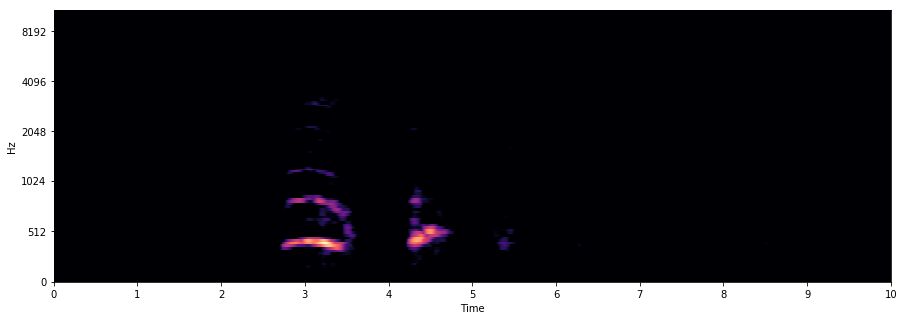

In [104]:
MS = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.amplitude_to_db(MS)

plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

logS.shape

In [661]:
MS = librosa.feature.melspectrogram(y, sr=sr, n_fft=4096, hop_length=256)
logS = librosa.amplitude_to_db(MS)

plt.figure(figsize=(15, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')

logS.shape

ParameterError: data must be of type numpy.ndarray

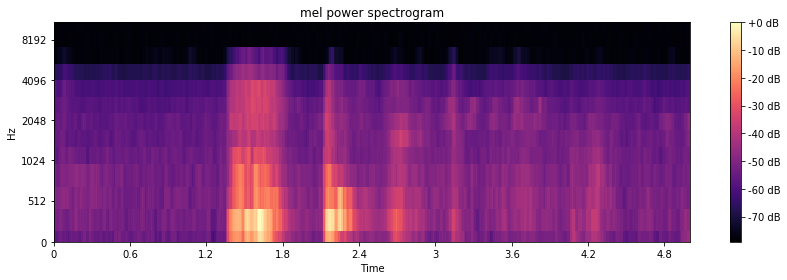

In [106]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=13)#128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


In [122]:
mfccs = librosa.feature.mfcc(y, n_mfcc=20, sr=sr)
print(mfccs.shape)

(20, 431)


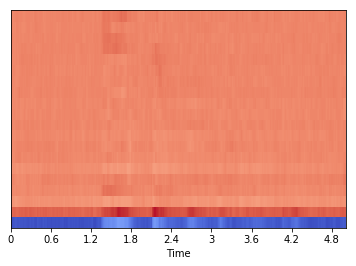

In [123]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[ 1.88300007e-16 -1.39486257e-16  1.13211837e-16 -1.18492481e-17
  3.40021901e-17 -6.38829026e-17  1.00976201e-16  1.00461016e-17
  1.95770185e-17 -5.74430938e-17  2.06073879e-18  2.67896043e-17
  1.80314644e-17 -2.42136808e-17 -6.69740108e-17  1.15916557e-17
 -7.40578004e-19 -2.24749325e-17  4.14723682e-17  2.38272923e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


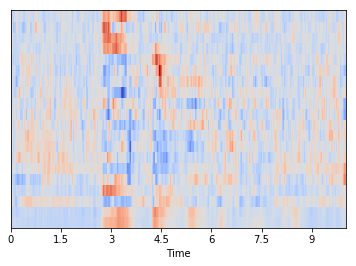

In [223]:
import sklearn

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [224]:
mfccs.mean(axis=1)

array([ 1.88300007e-16, -1.39486257e-16,  1.13211837e-16, -1.18492481e-17,
        3.40021901e-17, -6.38829026e-17,  1.00976201e-16,  1.00461016e-17,
        1.95770185e-17, -5.74430938e-17,  2.06073879e-18,  2.67896043e-17,
        1.80314644e-17, -2.42136808e-17, -6.69740108e-17,  1.15916557e-17,
       -7.40578004e-19, -2.24749325e-17,  4.14723682e-17,  2.38272923e-17])

## Model Prototype
- Make a dictionary: {.wav string : ndarray
Goal:
Cols 

In [160]:
mfccs.shape[0]
feature_cols_mfcc = ['mfcc_'+str(num) if len(str(num))==2 else 'mfcc_0'+str(num) for num in range(mfccs.shape[0])]   # list of strings for DF header

 

In [263]:
cry_data = []
for file in (cry_list + silent_list):
    
    y, sr = librosa.load(file, sr=44100)
    
    mfccs = librosa.feature.mfcc(y, n_mfcc=13, sr=sr)
    
    cry_data.append(dict(zip(['label'] + feature_cols_mfcc, [int('crying' in file)] + list(mfccs.mean(axis=1)))))
     

In [265]:
cry_data

[{'label': 1,
  'mfcc_00': -768.3756639102927,
  'mfcc_01': 105.04544690977885,
  'mfcc_02': -48.949624724408686,
  'mfcc_03': 1.243085838798432,
  'mfcc_04': 0.1774943830270187,
  'mfcc_05': -28.58482648308594,
  'mfcc_06': -2.281125860258373,
  'mfcc_07': -6.560056689567767,
  'mfcc_08': -10.92798372781611,
  'mfcc_09': 1.2455383684483539,
  'mfcc_10': -6.056558473936755,
  'mfcc_11': -3.98527383409727,
  'mfcc_12': 1.8510074760302018},
 {'label': 1,
  'mfcc_00': -737.3253701803525,
  'mfcc_01': 91.27952565894627,
  'mfcc_02': -33.20654135754905,
  'mfcc_03': -3.1912564290820042,
  'mfcc_04': 1.915339032398654,
  'mfcc_05': -24.201259158060545,
  'mfcc_06': -7.922936532874955,
  'mfcc_07': -4.498896201651541,
  'mfcc_08': -10.175341374332834,
  'mfcc_09': -2.8985552529254894,
  'mfcc_10': -5.40458392409557,
  'mfcc_11': -6.221960082367527,
  'mfcc_12': -0.7468326938846164},
 {'label': 1,
  'mfcc_00': -743.9693349262634,
  'mfcc_01': 128.79586729340107,
  'mfcc_02': -54.66041205804168

In [201]:
df

,label,mfcc_00,mfcc_01,mfcc_02,mfcc_03,mfcc_04,mfcc_05,mfcc_06,mfcc_07,mfcc_08,mfcc_09,mfcc_10,mfcc_11,mfcc_12,rmse,spectral_bandwidth,spectral_centroid,spectral_rolloff,zcr
0,1.0,-768.375664,105.045447,-48.949625,1.243086,0.177494,-28.584826,-2.281126,-6.560057,-10.927984,1.245538,-6.056558,-3.985274,1.851007,0.000310,4696.654081,4268.093544,11677.112916,0.102963
1,1.0,-737.325370,91.279526,-33.206541,-3.191256,1.915339,-24.201259,-7.922937,-4.498896,-10.175341,-2.898555,-5.404584,-6.221960,-0.746833,0.000458,4355.717348,3832.486356,9814.993860,0.095094
2,1.0,-743.969335,128.795867,-54.660412,0.884953,1.064819,-30.957344,-0.893344,-11.192552,-15.319531,2.526045,-8.431053,-5.775144,1.979822,0.000377,4131.406059,3591.843705,8890.015385,0.089624
3,1.0,-708.806721,134.797340,-49.032352,3.078373,-0.894575,-36.447055,-8.697726,-12.577379,-14.441062,0.626627,-6.177967,-2.175907,4.224580,0.000839,3639.249503,3076.146098,7226.005882,0.076038
4,1.0,-707.520214,101.020843,-51.507393,4.015465,-1.706717,-33.051905,-4.922206,-7.652123,-9.674420,0.876348,-7.134992,-3.033374,3.011047,0.000731,3902.619221,3766.007534,8733.087795,0.108653
5,1.0,-735.374496,101.771306,-39.029272,-1.134859,-1.020859,-27.094090,-4.305637,-7.388106,-12.864329,-0.322308,-5.743682,-4.704314,3.133778,0.000611,4332.295475,3883.305882,10370.610454,0.094784
6,1.0,-719.320258,94.172428,-31.534587,-3.739060,-1.598073,-25.670674,-7.120582,-8.449233,-14.633028,-1.286540,-3.500054,-5.213483,2.566259,0.000625,4096.952254,3660.283359,8983.292624,0.094690
7,1.0,-749.673243,122.343298,-53.861459,6.941743,1.606771,-34.477709,-2.522637,-10.147548,-13.112390,3.855360,-9.273767,-6.060432,5.006417,0.000354,4267.586052,3809.406858,9626.241095,0.096386
8,1.0,-749.691826,110.240495,-31.887717,-0.956716,2.069629,-25.302627,-5.547010,-6.321953,-12.662641,-0.458306,-4.723887,-5.136279,2.798139,0.000530,4430.683552,3802.666460,10487.415876,0.087520
9,1.0,-777.930953,112.348019,-40.177110,4.346391,4.337541,-24.898273,0.035947,-5.863305,-12.003978,2.347249,-6.934576,-4.489240,4.147684,0.000259,4761.330503,4179.485454,11690.480895,0.095284


In [91]:
import numpy as np
list_ = [range(5),np.nan]
any(list_)
all(list_)

True

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
#from sklearn_pandas import DataFrameMapper, GridSearchCV
from sklearn.model_selection import GridSearchCV

In [250]:
train, test = train_test_split(df, test_size=0.2)


In [ ]:
print(classification_report(y_))

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1),df['label'], test_size=0.2) #, stratify=df['label'])



In [183]:
logit = LogisticRegression()
svc = SVC()

scaler = StandardScaler().fit(X_train)  #FIT
X_train_scaled = scaler.transform(X_train)

svc.fit(X_train_scaled, y_train)   #FIT

X_test_scaled = scaler.transform(X_test)
y_pred = svc.predict(X_test_scaled)

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svcgs = SVC()
clf = GridSearchCV(svcgs, parameters)
clf.fit(X_train_scaled, y_train)  #FIT
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

In [218]:
y_pred[0:1]

array([1.])

In [197]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
roc_auc_score(y_test, y_pred)

0.9315501869427667

In [290]:
concat.shape

(18, 369)

In [292]:
pd.DataFrame(concat)

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,0.063477,0.095215,0.123535,0.119629,0.121094,0.117188,0.118652,0.120117,0.117188,0.116699,...,0.095215,0.088867,0.085938,0.094727,0.081543,0.057617,0.034180,0.004883,0.00000,0.00000
1,0.000052,0.000051,0.000052,0.000052,0.000051,0.000052,0.000053,0.000055,0.000057,0.000055,...,0.000059,0.000060,0.000058,0.000055,0.000047,0.000034,0.000024,0.000008,0.00000,0.00000
2,-817.816071,-805.647991,-803.553246,-808.905074,-810.614914,-809.605114,-804.305986,-800.174737,-800.637488,-802.151649,...,-799.985329,-798.394358,-801.670912,-808.720806,-819.165970,-850.117545,-966.427286,-1131.370850,-1131.37085,-1131.37085
3,76.107128,81.011545,83.946739,83.939707,84.122895,86.946023,91.956278,94.694985,95.026834,92.283259,...,104.419128,108.856695,105.143979,96.559339,90.083514,81.326220,68.256612,0.000000,0.00000,0.00000
4,-46.780137,-52.777577,-52.997306,-51.992924,-48.772826,-45.850875,-44.345970,-43.999956,-43.811157,-50.635482,...,-36.319606,-36.585547,-43.667213,-47.945274,-41.178261,-42.831431,-50.264386,0.000000,0.00000,0.00000
5,3.200761,-0.426217,2.327390,1.700025,0.920130,2.510577,4.728814,4.027228,2.665888,-1.845478,...,-4.090369,-5.335408,-7.517535,-6.473420,-6.372439,-0.867506,-0.645721,0.000000,0.00000,0.00000
6,2.819269,0.749026,5.783903,8.829027,5.643528,4.517905,5.323974,8.262104,10.810165,11.251998,...,4.552149,7.896367,15.104454,15.931106,11.141864,12.955966,8.168429,0.000000,0.00000,0.00000
7,-14.053236,-18.383585,-17.978960,-16.406194,-16.294492,-18.381668,-19.352272,-18.560038,-15.025434,-11.263978,...,-22.501926,-14.720946,-10.575527,-16.078378,-21.067564,-22.261733,-29.880531,0.000000,0.00000,0.00000
8,5.327186,3.953400,6.354701,8.968681,8.439512,6.162976,10.579429,9.510778,4.841742,3.622640,...,0.139129,5.035223,-0.396052,-1.481289,-5.716203,-4.606932,-11.020510,0.000000,0.00000,0.00000
9,3.205910,-0.518610,-2.484197,-4.557065,-2.199633,-3.058086,3.788005,3.829714,-1.067377,-0.685272,...,0.360679,4.409592,9.313913,11.070752,10.328481,9.871105,4.656722,0.000000,0.00000,0.00000


In [280]:
'Python'.__add__('ic')

'Pythonic'

In [281]:
from collections import Counter

c = Counter('gagggagagadd')

In [282]:
c

Counter({'a': 4, 'd': 2, 'g': 6})

In [220]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [223]:
from bokeh.plotting import figure, output_file, output_notebook, show

# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# output to static HTML file
output_notebook()#"log_lines.html")

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
   x_axis_label='sections', y_axis_label='particles'
)

# add some renderers
p.line(x, x, legend="y=x")
p.circle(x, x, legend="y=x", fill_color="white", size=8)
p.line(x, y0, legend="y=x^2", line_width=3)
p.line(x, y1, legend="y=10^x", line_color="red")
p.circle(x, y1, legend="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend="y=10^x^2", line_color="orange", line_dash="4 4")

# show the results
show(p)

Loading BokehJS ...

In [226]:
import numpy as np
import bokeh
bokeh.sampledata.download()

from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

# prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype=np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# output to static HTML file
output_file("stocks.html", title="stocks.py example")

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(aapl_dates, aapl, size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(aapl_dates, aapl_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "AAPL One-Month Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

Creating /Users/timcodes/.bokeh directory
Creating /Users/timcodes/.bokeh/data directory
Using data directory: /Users/timcodes/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]

In [576]:
sound_root = '../data/training_data/'

sound_folders = ['crying', 'silence', 'noise', 'baby_laugh',
                 'aria_crying', 'aria_other']

train_test = []

for file in os.scandir(sound_root):
    print(file)
        #if file.endswith('.wav'):
        #    print(file)


<DirEntry '.DS_Store'>
<DirEntry 'aria_crying'>
<DirEntry 'aria_other'>
<DirEntry 'baby_laugh'>
<DirEntry 'crying'>
<DirEntry 'noise'>
<DirEntry 'silence'>


In [581]:
raw = vec = mat = list()

In [584]:
11*10*60*8

52800

In [631]:
import os

import numpy as np
from sklearn.model_selection import train_test_split

import features


PICKLE_PATH = '../data/pickles/train_test_sets.pkl'


def label_raw_and_vec(label, unshaped_array):
    """
    Concatenate data label with 1D vector in get_train_test. Works only for
    label + raw and label + vec to convert dims (), (x,) -> (1, x+1). Does not
    work for mat.

    :param label: int.
    :param unshaped_array: np.array, dims (x,).
    :return:
    """
    label_ = np.array([[label]])
    vec_ = unshaped_array.reshape(1, -1)

    return np.concatenate((label_, vec_), axis=1)


def get_train_test(from_pickle=False, training_format = 'vec',
                       train_test_split=0.25):
    """
    Create a training and test sets.

    :param from_pickle:
    :return: sklearn.model_selection.train_test_split()
    """

    if not from_pickle:
        sound_root = '../data/training_data/'

        sound_folders = ['crying', 'silence', 'noise', 'baby_laugh',
                         'aria_crying', 'aria_other']

        raw_list = []
        vec_list = []
        mat_list = []

        for folder in sound_folders:

            label = int('crying' in folder)  # data labels are determined by
                                             # folder name.

            path = os.path.join(sound_root, folder)

            for file in os.listdir(path):

                if file.endswith(('.wav', '.ogg')):

                    file_path = os.path.join(path, file)

                    f = features.Features(file_path).featurize()

                    raw_list.append(label_raw_and_vec(label, f.raw))
                    vec_list.append(label_raw_and_vec(label, f.vec))

                    mat_list.append((label, f.mat))  # append as tuple because
                                                     # not sure if can concat
                                                     # 0 D label w 2D tensor

    

    # TODO: Re-Write interface for mat_list elements to fit with 1D convnet.

    return raw_list, vec_list, mat_list


if __name__ == '__main__':

    raw_list, vec_list, mat_list = get_train_test(from_pickle=False,
                                                  training_format='vec',
                                                  train_test_split=0.25)



    pass


In [654]:
testtrain = np.concatenate(vec_list)

In [652]:
df = pd.DataFrame(testtrain)

In [660]:
from pprint import pprint
pprint(testtrain[:,1:])

array([[ 1.05069872e-01,  8.28790362e-05,  4.50191169e+03, ...,
        -5.23074486e+00, -4.42270502e+00,  9.57338468e-01],
       [ 1.10957902e-01,  5.91731277e-05,  4.72751627e+03, ...,
        -5.04643826e+00, -3.86102444e+00,  2.13397981e+00],
       [ 1.09747515e-01,  5.93862116e-05,  4.70733654e+03, ...,
        -6.14449994e+00, -3.94622214e+00,  1.38536671e+00],
       ...,
       [ 9.01795866e-02,  1.40632060e-04,  3.41415708e+03, ...,
        -7.72986789e+00, -7.43219606e+00, -3.70286258e-01],
       [ 1.14036596e-01,  2.04771487e-04,  3.32400677e+03, ...,
        -6.34270266e+00, -7.60357701e+00,  1.19116057e+00],
       [ 1.16328984e-01,  2.60433980e-04,  3.23828184e+03, ...,
        -8.12215958e+00, -6.26463735e+00,  3.19933233e+00]])


In [663]:
mat_list

[(0, array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           9.66796875e-02,  9.86328125e-02,  7.42187500e-02],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           6.34677272e-05,  6.28412745e-05,  6.09643357e-05],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           4.59344287e+03,  4.57050564e+03,  4.44369208e+03],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -3.73931561e+00,  9.88584368e-01,  3.87199103e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -5.27524448e+00,  1.14945289e+00,  4.09397103e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           5.74074041e+00,  8.10328865e+00,  7.92287289e+00]])),
 (0, array([[ 4.44335938e-02,  7.17773438e-02,  9.86328125e-02, ...,
           1.07910156e-01,  1.03515625e-01,  7.47070312e-02],
         [ 5.58490101e-05,  5.68377109e-05,  5.69775511e-05, ...,
           5.48

In [735]:
def label_raw_and_vec(label, unshaped_array):
    """
    Concatenate data label with 1D vector in get_train_test. Works only for
    label + raw and label + vec to convert dims (), (x,) -> (1, x+1). Does not
    work for mat.

    :param label: int.
    :param unshaped_array: np.array, dims (x,).
    :return:
    """
    label_ = np.array([[label]])
    vec_ = unshaped_array.reshape(1, -1)

    return np.concatenate((label_, vec_), axis=1)


def get_train_test(from_pickle=False, training_format = 'vec',
                       train_test_split=0.25):
    """
    Create a training and test sets.

    :param from_pickle:
    :return: sklearn.model_selection.train_test_split()
    """

    if not from_pickle:
        sound_root = '../data/training_data/'

        sound_folders = ['crying', 'silence', 'noise', 'baby_laugh',
                         'aria_crying', 'aria_other']

        label_list = []
        raw_list = []
        vec_list = []
        mat_list = []

        for folder in sound_folders:

            label = int('crying' in folder)  # data labels are determined by
                                             # folder name.

            path = os.path.join(sound_root, folder)

            for file in os.listdir(path):

                if file.endswith(('.wav', '.ogg')):

                    file_path = os.path.join(path, file)

                    f = features.Features(file_path).featurize()

                    if len(f.raw) != f.TRUNCLENGTH:
                        print(f'Skipping {file} because it is likely too short')
                        continue

                    #raw_list.append(label_raw_and_vec(label, f.raw))
                    #vec_list.append(label_raw_and_vec(label, f.vec))

                    label_list.append(np.array([label]))
                    raw_list.append(f.raw.reshape(1, -1))
                    vec_list.append(f.vec.reshape(1, -1))
                    mat_list.append(f.mat.reshape(1,
                                                  f.mat.shape[1],
                                                  f.mat.shape[0]))
                    #mat_list.append((label, f.mat))  # append as tuple because
                                                     # not sure if can concat
                                                     # 0 D label w 2D tensor

    # TODO: Re-Write interface for mat_list elements to fit with 1D convnet.

    training_data = dict()

    #training_data['raw'], training_data['vec'], training_data['mat'] = \
    #    np.concatenate(raw_list), np.concatenate(vec_list), mat_list


    #if training_format = 'vec':
    #    return train_test_split()
    return label_list, raw_list, vec_list, mat_list


In [736]:
%%time
label_list, raw_list, vec_list, mat_list = get_train_test(from_pickle=False,
                                                  training_format='vec',
                                                  train_test_split=0.25)

Skipping out00081.wav because it is likely too short
Skipping aria_crying_w_footsteps005.wav because it is likely too short
Skipping aria_noise_silence060.wav because it is likely too short
CPU times: user 2min 1s, sys: 13.4 s, total: 2min 15s
Wall time: 1min 14s


In [726]:
np.concatenate(label_list).shape #.transpose().shape

(549,)

In [737]:
for i in raw_list:
    if i.shape[1] != 218111:
        print(i.shape[1])

In [738]:
np.concatenate(raw_list, axis=0).shape

(546, 218111)

In [739]:
np.concatenate(mat_list, axis=0).shape

(546, 426, 18)

In [693]:
df = pd.DataFrame(raw_list)

,0,1,2,3,4,5,6,7,8,9,...,218101,218102,218103,218104,218105,218106,218107,218108,218109,218110
0,0.000000,0.000000,0.000031,-0.000031,0.000031,-0.000061,0.000366,0.001007,-0.000092,-0.000488,...,0.005188,0.005768,0.005188,0.003357,0.003876,0.005280,0.004791,0.004303,0.005157,0.004395
1,0.023438,0.021423,0.008911,0.002350,0.003357,0.001556,-0.004333,0.003204,0.001190,-0.019012,...,0.002747,0.004242,0.003967,0.001923,0.000122,0.002563,0.007416,0.004608,-0.001068,0.003113
2,0.112762,0.122833,0.143341,0.123322,0.057861,0.028229,-0.025757,-0.045410,-0.045074,-0.087311,...,0.011871,0.013489,0.013916,0.013184,0.012054,0.010559,0.009033,0.006561,0.003357,0.001984
3,-0.000397,-0.054932,-0.065948,-0.032288,0.002960,0.003357,-0.030792,-0.031647,0.007477,0.039368,...,-0.058136,-0.060760,-0.054749,-0.043549,-0.035461,-0.027039,-0.022003,-0.027588,-0.032623,-0.030029
4,0.028595,0.025177,0.016907,0.022675,0.023651,0.016235,0.008484,0.023163,0.041931,0.045959,...,0.025879,0.022888,0.033417,0.030060,0.016357,0.025635,0.032562,0.016571,0.011078,0.018677
5,0.008057,0.007935,0.006317,0.006378,0.005524,0.005646,0.004669,0.004181,0.003296,0.003143,...,0.011993,0.012634,0.013611,0.007385,0.001160,0.004242,0.008545,0.008728,0.007294,0.003632
6,0.136078,0.126740,0.065033,0.010742,-0.060913,-0.100464,-0.115967,-0.083191,-0.049713,-0.010132,...,-0.085449,-0.092346,-0.099548,-0.104950,-0.106018,-0.104858,-0.106232,-0.109589,-0.111023,-0.111816
7,-0.076416,-0.095428,-0.091370,-0.100769,-0.096130,-0.093811,-0.089111,-0.075012,-0.044556,-0.036560,...,-0.022705,-0.052673,-0.059387,-0.032593,0.008270,0.026550,0.011841,-0.022400,-0.070251,-0.125305
8,0.038910,0.043396,0.035065,0.028992,0.029114,0.044159,0.056641,0.069733,0.077972,0.086182,...,-0.201599,-0.165436,-0.131012,-0.113068,-0.101685,-0.098602,-0.099701,-0.083984,-0.056641,-0.027252
9,-0.006409,-0.006073,-0.004791,-0.004028,0.000610,0.005096,0.006500,0.003906,0.000061,-0.006317,...,0.002228,0.001099,-0.001038,-0.002777,-0.006561,-0.012299,-0.013550,-0.011841,-0.010559,-0.009766


In [708]:
mat_list[0].reshape(1, mat_list[0].shape[1], mat_list[0].shape[0]).shape

(1, 426, 18)

In [707]:
mat_list[0].shape

(18, 426)

In [711]:
raw_list[0].reshape(1, -1).shape

(1, 218111)

In [716]:
np.array([label_list[0]]).shape

(1,)

In [717]:
nL = [np.array([label]) for label in label_list]

In [720]:
np.concatenate(nL).shape

(549,)

In [723]:
type(mat_list[0])

numpy.ndarray

In [742]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [743]:
A.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [744]:
A.reshape(1, 2, 3)

array([[[1, 2, 3],
        [4, 5, 6]]])

In [745]:
A.transpose().reshape(1,2,3)

array([[[1, 4, 2],
        [5, 3, 6]]])

In [746]:
A.transpose().reshape(1,3,2)

array([[[1, 4],
        [2, 5],
        [3, 6]]])